# Apple Music Project
##### By TeVaughn Shaw

### Background on Dataset

The dataset used for this project is a 2020 Apple Music Play activity csv file obtained by direct request to Apple from TeVaughn's Apple ID user account. The file is already in a structured format so there was no need to worry about structuring the data. Since the data is a readable table format the use of PySpark to execute SQL functions and Python code together to accomplish the project was decided to be the best approach.

### Description of Dataset

-<b>Apple Id Number</b>: unique user id<br>
-<b>Apple Music Subscription</b>: boolean if user is subscribed to Apple Music service<br>
-<b>Artist Name</b>: name of song artist(s)<br>
-<b>Build Version</b>: displays subscription software version and device information<br>
-<b>Client IP Address</b>: describes computer being used for stream<br>
-<b>Content Name</b>: title of song<br>
-<b>Content Provider</b>: name of record label<br>
-<b>Content Specific Type</b>: type the content that is being listened to such as 'Song'<br>
-<b>Device Identifier</b>: not entirely sure, but looks like id attached to device used to service<br>
-<b>End Position In Milliseconds</b>: point in which song ended<br>
-<b>End Reason Type</b>: reason song ended<br>
-<b>Event End Timestamp</b>: date song ended<br>
-<b>Event Reason Hint Type</b>: this column is not specified<br>
-<b>Event Received Timestamp</b>: date timestamp, majorily matches event start timestamp, usage unknown<br>
-<b>Event Start Timestamp</b>: date timestamp, its usage is unknown<br>
-<b>Event Type</b>: displays song start, ends, or whether lyrics displayed<br>
-<b>Feature Name</b>: if content play from library, browser tab, for you tab, or searched<br>
-<b>Genre</b>: music genre for song<br>
-<b>Item type</b>: Apple's own use column for itunes store content and aggregate non content play time<br>
-<b>Media Duration In Milliseconds</b>: duration song played in milliseconds<br>
-<b>Media Type</b>: file type of content. All audio file types for songs<br>
-<b>Metrics Bucket Id</b>: deals with metrics configuration somehow? not entirely sure<br>
-<b>Metrics Client Id</b>:unknown<br>
-<b>Milliseconds Since Play</b>: milliseconds since play<br>
-<b>Offline</b>: whether song is downloaded for offline usage or not<br>
-<b>Original Title</b>: empty column<br>
-<b>Play Duration In Milliseconds</b>: length of song in milliseconds<br>
-<b>Source Type</b>: where streaming originated<br>
-<b>Start Position In Milliseconds</b>: unknown what this column actually means, start position where?<br>
-<b>Store Country Name</b>: country user is located to access service content<br>
-<b>UTC Offset In Seconds</b>: difference in seconds between Coordinated Universal Time (UTC) and local time

### Questions to Answer from Dataset

1. What were some of the top played songs and artists?
2. What were the top 10 artists that occured the most within the dataset?

In [48]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession, SQLContext
from pyspark import SparkContext

In [5]:
spark=SparkSession.builder.appName('AppMusic').getOrCreate()

In [6]:
spark

In [171]:
df_pyspark=spark.read.csv('2020_Apple Music Play Activity.csv')

In [173]:
# another way to read in csv file with header
df_pyspark=spark.read.csv('2020_Apple Music Play Activity.csv',header=True,inferSchema=True)
df_pyspark.show()

+---------------+------------------------+-------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+----------------------------+--------------------+--------------------+----------------------+------------------------+---------------------+----------+--------------------+-----------+--------------------+------------------------------+----------+-----------------+--------------------+-----------------------+-------+--------------+--------------------------+------------------+------------------------------+------------------+---------------------+
|Apple Id Number|Apple Music Subscription|  Artist Name|       Build Version|   Client IP Address|        Content Name|    Content Provider|Content Specific Type|   Device Identifier|End Position In Milliseconds|     End Reason Type| Event End Timestamp|Event Reason Hint Type|Event Received Timestamp|Event Start Timestamp|Event Type|        Feature Name|      Ge

In [174]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [24]:
# check datatypes
df_pyspark.dtypes

[('Apple Id Number', 'bigint'),
 ('Apple Music Subscription', 'boolean'),
 ('Artist Name', 'string'),
 ('Build Version', 'string'),
 ('Client IP Address', 'string'),
 ('Content Name', 'string'),
 ('Content Provider', 'string'),
 ('Content Specific Type', 'string'),
 ('Device Identifier', 'string'),
 ('End Position In Milliseconds', 'int'),
 ('End Reason Type', 'string'),
 ('Event End Timestamp', 'timestamp'),
 ('Event Reason Hint Type', 'string'),
 ('Event Received Timestamp', 'timestamp'),
 ('Event Start Timestamp', 'timestamp'),
 ('Event Type', 'string'),
 ('Feature Name', 'string'),
 ('Genre', 'string'),
 ('Item Type', 'string'),
 ('Media Duration In Milliseconds', 'int'),
 ('Media Type', 'string'),
 ('Metrics Bucket Id', 'int'),
 ('Metrics Client Id', 'string'),
 ('Milliseconds Since Play', 'int'),
 ('Offline', 'boolean'),
 ('Original Title', 'string'),
 ('Play Duration Milliseconds', 'int'),
 ('Source Type', 'string'),
 ('Start Position In Milliseconds', 'int'),
 ('Store Country N

In [176]:
# drop columns in dataframe(df)
df2 = df_pyspark.drop(*('Apple Id Number', 'Apple Music Subscription', 'Build Version', 'Client IP Address', 'Content Specific Type',
                'Device Identifier', 'End Reason Type', 'Event End Timestamp', 'Event Reason Hint Type', 'Event Received Timestamp',
                'Event Start Timestamp', 'Event Type', 'Feature Name', 'Item Type', 'Media Type', 'Metrics Bucket Id', 'Metrics Client Id', 'Milliseconds Since Play',
                'Offline', 'Original Title', 'Play Duration Milliseconds', 'Source Type', 'Start Position In Milliseconds', 'Store Country Name',
                'End Position In Milliseconds', 'UTC Offset In Seconds'))

In [177]:
# columns used in dataset
df2.columns

['Artist Name',
 'Content Name',
 'Content Provider',
 'Genre',
 'Media Duration In Milliseconds']

In [178]:
df2.head(4)

[Row(Artist Name=None, Content Name=None, Content Provider=None, Genre=None, Media Duration In Milliseconds='259215'),
 Row(Artist Name=None, Content Name=None, Content Provider=None, Genre=None, Media Duration In Milliseconds='401310'),
 Row(Artist Name=None, Content Name=None, Content Provider=None, Genre=None, Media Duration In Milliseconds='1482210'),
 Row(Artist Name=None, Content Name=None, Content Provider=None, Genre=None, Media Duration In Milliseconds='322042')]

In [248]:
# Remove rows with any null values from df 
df3 = df2.na.drop(how="any")
df3.show()

+--------------------+--------------------+--------------------+-----------+------------------------------+
|         Artist Name|        Content Name|    Content Provider|      Genre|Media Duration In Milliseconds|
+--------------------+--------------------+--------------------+-----------+------------------------------+
|             Kehlani|Down For You (fea...|The Warner Music ...|   R&B/Soul|                        227880|
|               Adele|    Love in the Dark|          Sony Music|        Pop|                        286000|
|       Ariana Grande|           True Love|The Universal Mus...|    Holiday|                        166301|
|       Ariana Grande|           True Love|The Universal Mus...|    Holiday|                        166237|
|       Bryson Tiller|Money Problems / ...|          Sony Music|   R&B/Soul|                        299885|
|              H.E.R.|        Say It Again|          Sony Music|   R&B/Soul|                        172315|
|              H.E.R.|      

In [123]:
from pyspark.sql import *
from pyspark.sql.functions import sum

In [249]:
df4 = df3.groupBy('Artist Name', 'Content Name', 'Content Provider', 'Genre').agg(sum('Media Duration In Milliseconds').alias('DurationMS'))
df4.show()

+--------------------+--------------------+--------------------+--------------+-----------+
|         Artist Name|        Content Name|    Content Provider|         Genre| DurationMS|
+--------------------+--------------------+--------------------+--------------+-----------+
|         Iggy Azalea|       Walk the Line|The Universal Mus...|   Hip Hop/Rap|  3495362.0|
|Koosen, Green Bul...|         Tooth Fairy|Routenote / Insom...|Easy Listening|    97593.0|
|           Aaron May|   Focus (Interlude)|EMPIRE Distributi...|   Hip Hop/Rap|  2025000.0|
|    The Chainsmokers|Break Up Every Night|          Sony Music|         Dance|   207679.0|
|               Phora|Romeo (feat. Bran...|The Warner Music ...|   Hip Hop/Rap|  2127338.0|
|      Greyson Chance|          Twenty One|AWAL Digital Limited|           Pop|   771272.0|
|       Lewis Capaldi|       Before You Go|          UMG Global|   Alternative|1.1051835E7|
|         Chris Brown|              Liquor|          Sony Music|      R&B/Soul| 

In [251]:
# add new column to df taking DurationMS / 60,000 to get minutes using PySpark

df5 = df4.withColumn('Song_Minutes', df4.DurationMS / 60000)
df5.show()

+--------------------+--------------------+--------------------+--------------+-----------+------------------+
|         Artist Name|        Content Name|    Content Provider|         Genre| DurationMS|      Song_Minutes|
+--------------------+--------------------+--------------------+--------------+-----------+------------------+
|         Iggy Azalea|       Walk the Line|The Universal Mus...|   Hip Hop/Rap|  3495362.0|58.256033333333335|
|Koosen, Green Bul...|         Tooth Fairy|Routenote / Insom...|Easy Listening|    97593.0|           1.62655|
|           Aaron May|   Focus (Interlude)|EMPIRE Distributi...|   Hip Hop/Rap|  2025000.0|             33.75|
|    The Chainsmokers|Break Up Every Night|          Sony Music|         Dance|   207679.0| 3.461316666666667|
|               Phora|Romeo (feat. Bran...|The Warner Music ...|   Hip Hop/Rap|  2127338.0| 35.45563333333333|
|      Greyson Chance|          Twenty One|AWAL Digital Limited|           Pop|   771272.0|12.854533333333332|
|

In [151]:
from pyspark.sql.functions import round, col

In [252]:
# Round minute values down to two decimal places save into new df
df6 = df5.select("*", round("Song_Minutes", 2).alias('SongMinutes'))
df6.show()

+--------------------+--------------------+--------------------+--------------+-----------+------------------+-----------+
|         Artist Name|        Content Name|    Content Provider|         Genre| DurationMS|      Song_Minutes|SongMinutes|
+--------------------+--------------------+--------------------+--------------+-----------+------------------+-----------+
|         Iggy Azalea|       Walk the Line|The Universal Mus...|   Hip Hop/Rap|  3495362.0|58.256033333333335|      58.26|
|Koosen, Green Bul...|         Tooth Fairy|Routenote / Insom...|Easy Listening|    97593.0|           1.62655|       1.63|
|           Aaron May|   Focus (Interlude)|EMPIRE Distributi...|   Hip Hop/Rap|  2025000.0|             33.75|      33.75|
|    The Chainsmokers|Break Up Every Night|          Sony Music|         Dance|   207679.0| 3.461316666666667|       3.46|
|               Phora|Romeo (feat. Bran...|The Warner Music ...|   Hip Hop/Rap|  2127338.0| 35.45563333333333|      35.46|
|      Greyson C

In [254]:
# drop Song_Minutes column
df7 = df6.drop('Song_Minutes')
df7.show()

+--------------------+--------------------+--------------------+--------------+-----------+-----------+
|         Artist Name|        Content Name|    Content Provider|         Genre| DurationMS|SongMinutes|
+--------------------+--------------------+--------------------+--------------+-----------+-----------+
|         Iggy Azalea|       Walk the Line|The Universal Mus...|   Hip Hop/Rap|  3495362.0|      58.26|
|Koosen, Green Bul...|         Tooth Fairy|Routenote / Insom...|Easy Listening|    97593.0|       1.63|
|           Aaron May|   Focus (Interlude)|EMPIRE Distributi...|   Hip Hop/Rap|  2025000.0|      33.75|
|    The Chainsmokers|Break Up Every Night|          Sony Music|         Dance|   207679.0|       3.46|
|               Phora|Romeo (feat. Bran...|The Warner Music ...|   Hip Hop/Rap|  2127338.0|      35.46|
|      Greyson Chance|          Twenty One|AWAL Digital Limited|           Pop|   771272.0|      12.85|
|       Lewis Capaldi|       Before You Go|          UMG Global|

In [255]:
df8 = df7.orderBy(col("SongMinutes").desc())
df8.show()

+-----------------+--------------------+--------------------+-----------+-------------+-----------+
|      Artist Name|        Content Name|    Content Provider|      Genre|   DurationMS|SongMinutes|
+-----------------+--------------------+--------------------+-----------+-------------+-----------+
|    Ariana Grande|Best Mistake (fea...|The Universal Mus...|        Pop|1.026198443E9|   17103.31|
|      Nicki Minaj|            Shanghai|          UMG Global|Hip Hop/Rap|  7.8028796E8|    13004.8|
|       Kanye West|Monster (feat. Ja...|          UMG Global|Hip Hop/Rap| 5.77787849E8|     9629.8|
|      Nicki Minaj|        Did It On'em|          UMG Global|        Pop| 5.53139808E8|     9219.0|
|      Nicki Minaj|            MEGATRON|          UMG Global|Hip Hop/Rap| 1.92011494E8|    3200.19|
|    Ariana Grande|    Honeymoon Avenue|The Universal Mus...|        Pop|  1.8807601E8|     3134.6|
|    Ariana Grande|Break Your Heart ...|The Universal Mus...|        Pop| 1.65097237E8|    2751.62|


In [191]:
print(df8.count(), len(df8.columns)) #rows, columns

9538 6


In [198]:
# new df to find which artists occur the most in data
df9=df8.groupBy("Artist Name").count().orderBy(col("count").desc())
df9.show(10)

+-------------+-----+
|  Artist Name|count|
+-------------+-----+
|      Beyoncé|  135|
|        Logic|  131|
|        Drake|  115|
|  Chris Brown|  115|
|       Eminem|  107|
|Ariana Grande|  103|
|  Nicki Minaj|  101|
|         SoMo|   96|
|        Phora|   94|
|   Trey Songz|   84|
+-------------+-----+
only showing top 10 rows



In [201]:
# convert Artist Name col from df to list for line chart
pdf = df9.toPandas()
pdf

,Artist Name,count
0,Beyoncé,135
1,Logic,131
2,Drake,115
3,Chris Brown,115
4,Eminem,107
...,...,...
2035,Ryan Beatty,1
2036,Travie McCoy,1
2037,Stevie Nicks,1
2038,"Nicki Minaj, Mike WiLL Made-It",1


In [256]:
#grab top 10 artists in list
names=list(pdf['Artist Name'][:10])
names

['Beyoncé',
 'Logic',
 'Drake',
 'Chris Brown',
 'Eminem',
 'Ariana Grande',
 'Nicki Minaj',
 'SoMo',
 'Phora',
 'Trey Songz']

In [257]:
# convert count col from df to list for pie chart
# grab the top 10 count in list
numbers=list(pdf['count'][:10])
numbers

[135, 131, 115, 115, 107, 103, 101, 96, 94, 84]

### Visualization

In [204]:
import matplotlib.pyplot as plt

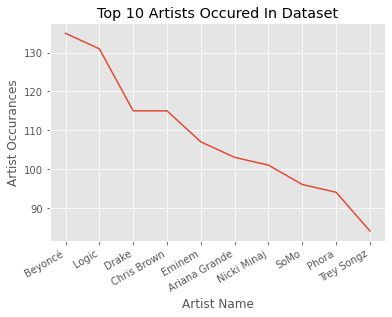

In [224]:
# line graph
plt.plot(names, numbers)
plt.title('Top 10 Artists Occured In Dataset')
plt.xlabel('Artist Name')
plt.ylabel('Artist Occurances')
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### Conclusion

2020 Apple Music Replay results from Apple:

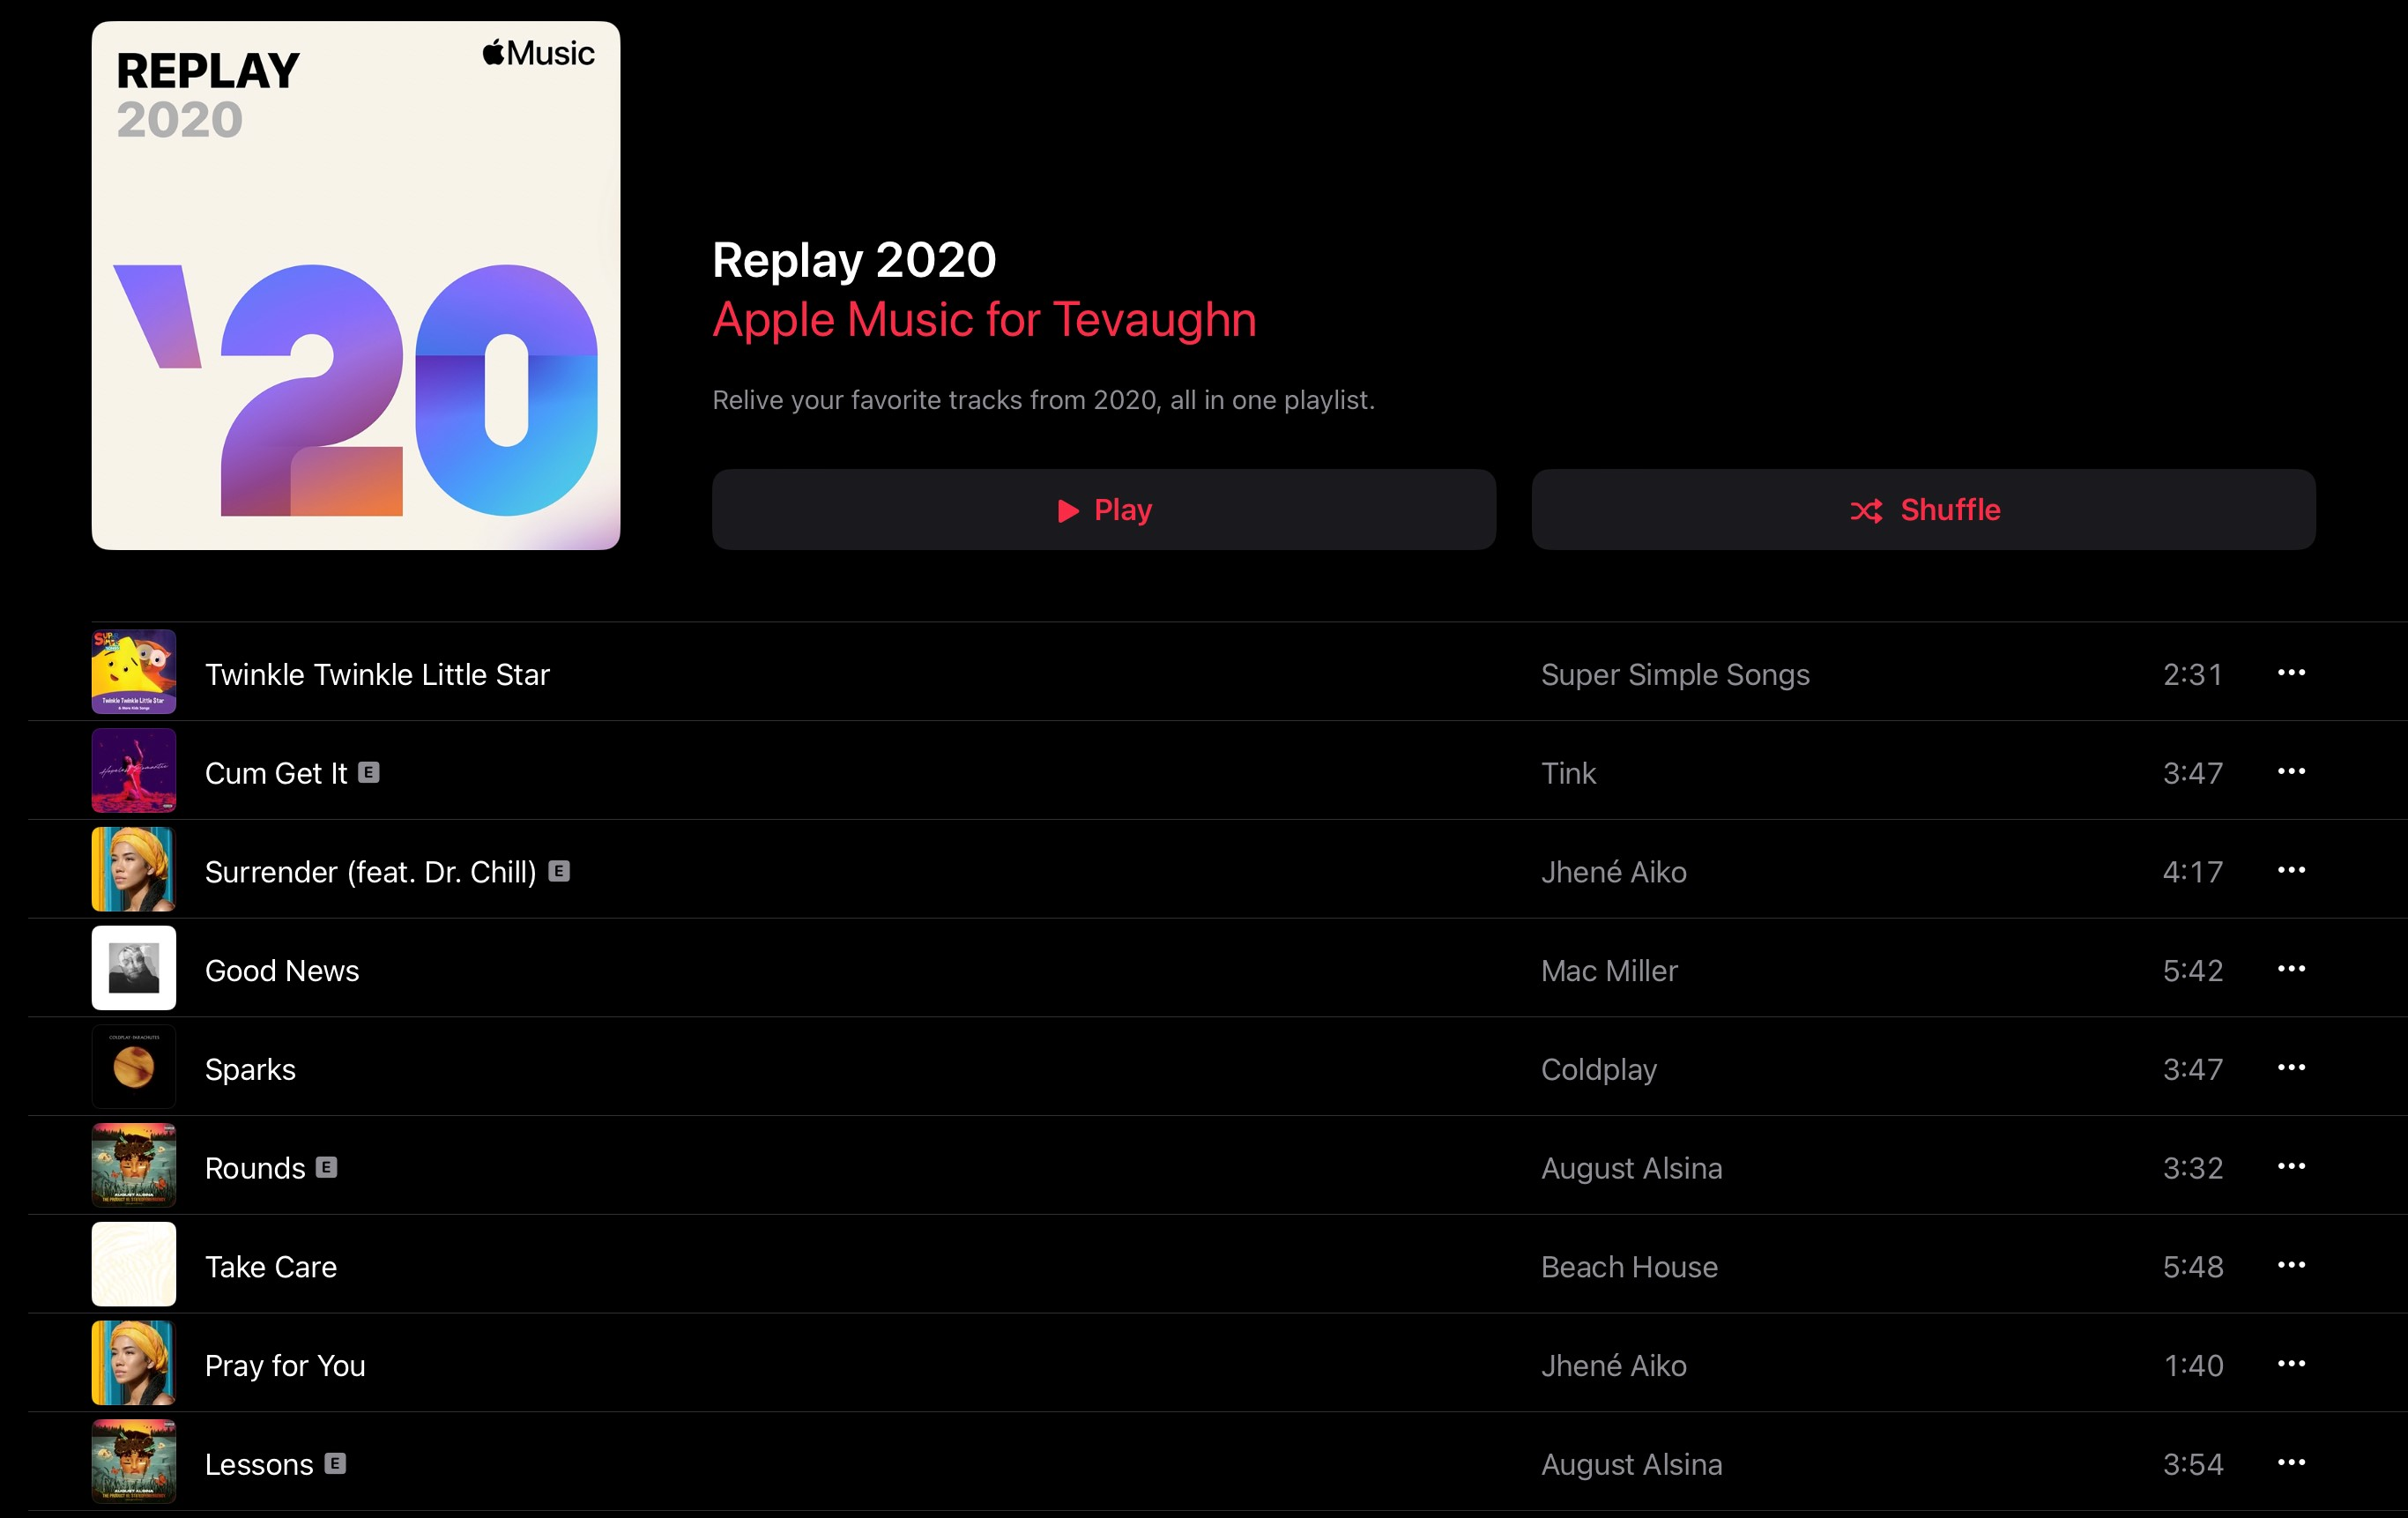

It remains unclear how Apple summarizes the metrics for their Apple Music users as none of the songs shown in the photo above were top played songs in the dataset. Could it be that their metrics are a variation of columns other than just the number of times the song has been played? Without any personal knowledge on how streaming music platforms actually work, it is hard to understand whether songs played on repeat are counted versus songs streamed outside of the user's library is added to the metric as well. Link to [Reddit](https://www.reddit.com/r/AppleMusic/comments/gavbh8/replay_2020_how_are_songs_counted/) discussion that shares my frustration on gauging Apple Music metrics. Overall, PySpark did prove to be a useful big data tool in this project while learning beginner friendly methods that come along with it.